In [1]:
!pip install spacy
!python -m spacy download en_core_web_lg


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 2.3 MB/s eta 0:00:0000:0100:03
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [3]:
 import spacy
nlp = spacy.load('en_core_web_lg')

/Users/srijamallipudi/anaconda3/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
import pandas as pd
df = pd.read_csv('identified_entities.csv')
df

,Entity,Label
0,recent years,DATE


Entities: ['renewable energy', 'photovoltaic cells', 'solar thermal systems', 'wind turbines', 'renewable energy']
Knowledge Graph:
                 Entity1                Entity2 Relation
0       renewable energy     photovoltaic cells  RELATED
1       renewable energy  solar thermal systems  RELATED
2       renewable energy          wind turbines  RELATED
3       renewable energy       renewable energy  RELATED
4     photovoltaic cells  solar thermal systems  RELATED
5     photovoltaic cells          wind turbines  RELATED
6     photovoltaic cells       renewable energy  RELATED
7  solar thermal systems          wind turbines  RELATED
8  solar thermal systems       renewable energy  RELATED
9          wind turbines       renewable energy  RELATED


/var/folders/2j/w_lhfdq903d569hgr3zdc7x80000gn/T/ipykernel_74519/3464464209.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"Entity1": entities[i], "Entity2": entities[j], "Relation": "RELATED"}, ignore_index=True)
/var/folders/2j/w_lhfdq903d569hgr3zdc7x80000gn/T/ipykernel_74519/3464464209.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"Entity1": entities[i], "Entity2": entities[j], "Relation": "RELATED"}, ignore_index=True)
/var/folders/2j/w_lhfdq903d569hgr3zdc7x80000gn/T/ipykernel_74519/3464464209.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"Entity1": entities[i], "Entity2": entities[j], "Relation": "RELATED"}, ignore_index=True)
/var/folders/2j/w_lhfdq90

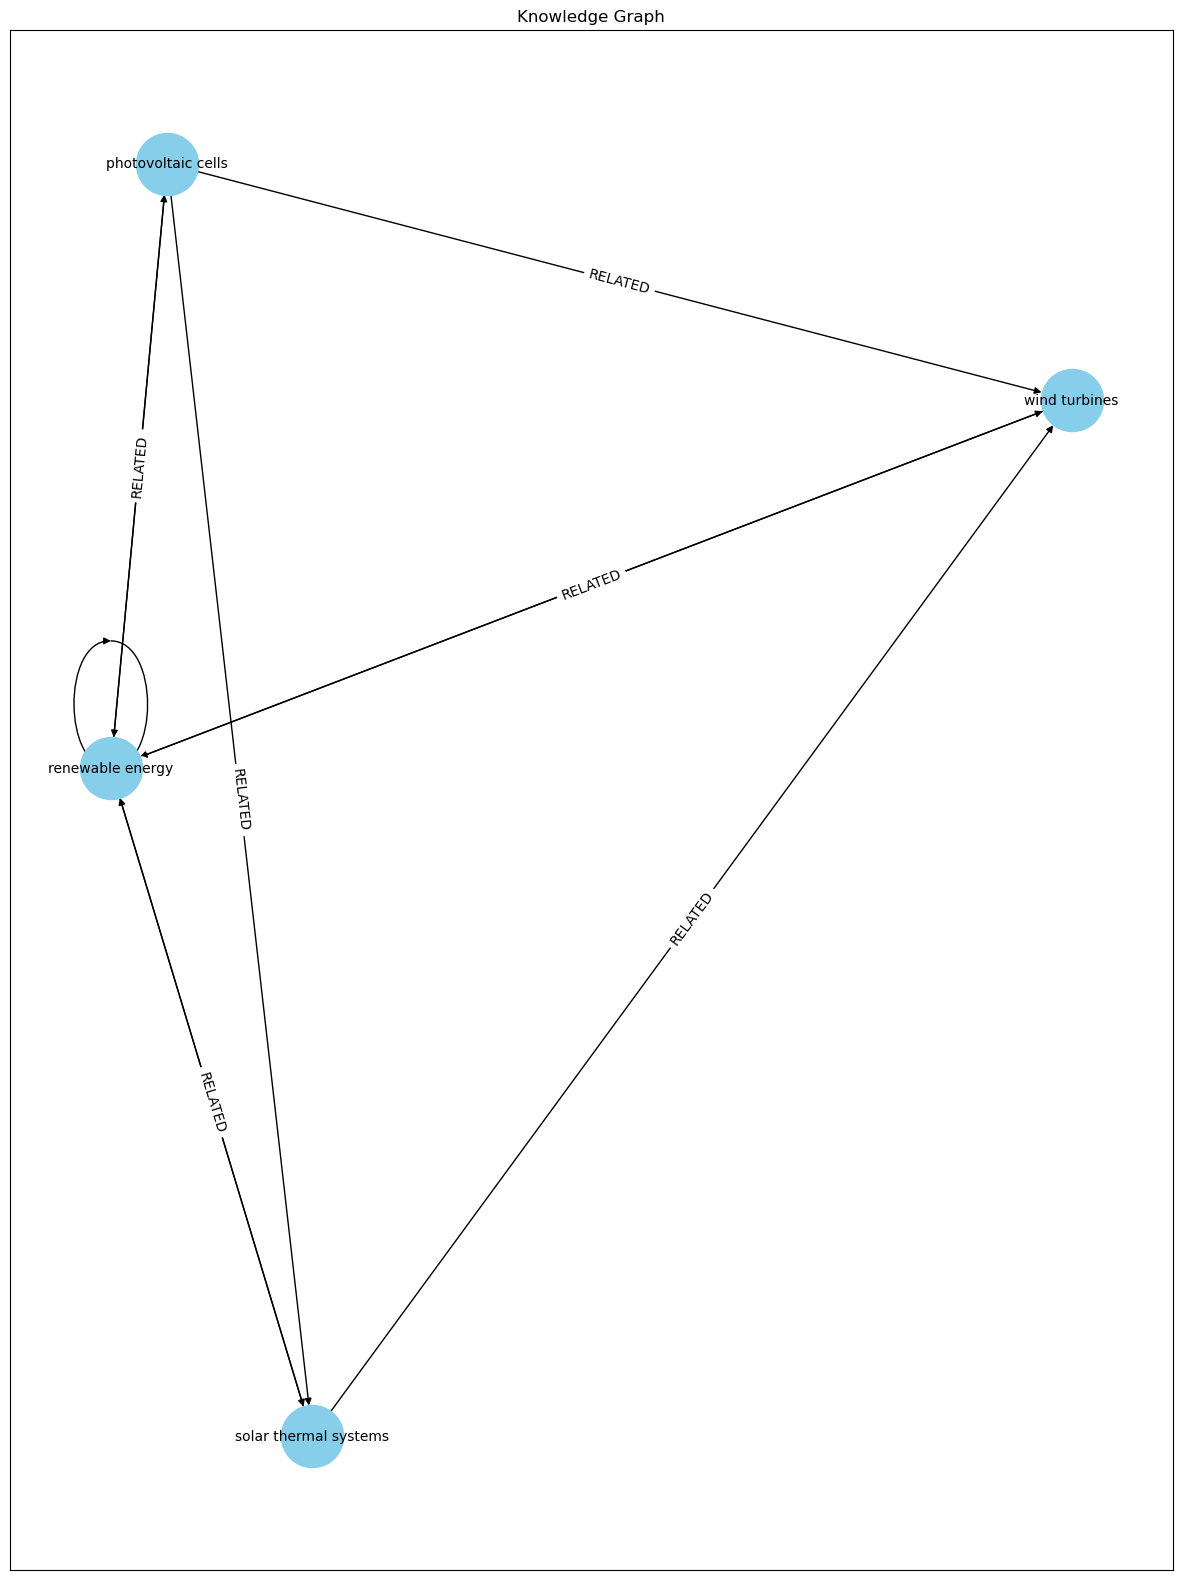

In [18]:
import spacy
from spacy.matcher import PhraseMatcher
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Define terms for different contexts
context_terms = {
    "renewable_energy": ["renewable energy", "solar energy", "wind energy", "hydropower", "biomass energy", "photovoltaic cells",
                         "solar thermal systems", "wind turbines", "wind farms", "hydropower plants", "tidal energy"],
    "finance": ["finance", "investment", "stock market", "portfolio", "dividend", "equity", "asset", "bond", "capital", "risk management"],
    "technology": ["technology", "innovation", "digital", "automation", "artificial intelligence", "machine learning", "internet of things", "cybersecurity", "blockchain", "cloud computing"],
    "healthcare": ["healthcare", "medical", "hospital", "doctor", "patient", "medicine", "treatment", "vaccine", "pandemic", "health insurance"],
    "education": ["education", "school", "teacher", "student", "university", "college", "learning", "curriculum", "online education", "e-learning"],
    "environment": ["environment", "climate change", "sustainability", "pollution", "conservation", "biodiversity", "carbon footprint", "global warming", "greenhouse gas", "natural resource"],
    "business": ["business", "company", "entrepreneur", "startup", "management", "strategy", "marketing", "sales", "customer", "productivity"],
    "travel": ["travel", "tourism", "destination", "hotel", "flight", "vacation", "holiday", "adventure", "sightseeing", "cultural"],
    "food": ["food", "nutrition", "diet", "restaurant", "cooking", "recipe", "organic", "vegan", "healthy eating", "culinary"],
    "art": ["art", "artist", "painting", "sculpture", "gallery", "music", "performance", "creative", "design", "culture"],
    "sports": ["sports", "athlete", "game", "competition", "fitness", "exercise", "team", "coach", "training", "championship"],
    "politics": ["politics", "government", "election", "democracy", "policy", "law", "political party", "voting", "legislation", "diplomacy"],
    "science": ["science", "research", "experiment", "discovery", "scientific", "theory", "scientist", "laboratory", "data", "analysis"],
    "history": ["history", "historical", "civilization", "archaeology", "ancient", "event", "documentary", "artifact", "heritage", "culture"],
    "fashion": ["fashion", "style", "clothing", "designer", "trend", "couture", "brand", "runway", "model", "accessory"],
    "literature": ["literature", "book", "author", "novel", "poetry", "fiction", "literary", "reading", "classic", "writing"],
    "architecture": ["architecture", "building", "design", "structure", "urban", "construction", "architect", "skyscraper", "landmark", "modern"],
    "space": ["space", "astronomy", "galaxy", "planet", "exploration", "cosmos", "universe", "astronaut", "telescope", "star"]
}
  


def identify_context(text):
    # Initialize context to None
    context = None
    # Iterate over context terms and check if any term is present in the text
    for ctx, terms in context_terms.items():
        for term in terms:
            if term in text:
                context = ctx
                break
        if context:
            break
    return context

def extract_entities(text, context):
    # Load the spaCy model based on the context
    nlp = spacy.load("en_core_web_lg")
    # Initialize PhraseMatcher with the shared vocab
    matcher = PhraseMatcher(nlp.vocab)
    # Create pattern doc objects from the terms specific to the context
    pattern_docs = [nlp(term) for term in context_terms[context]]
    # Add patterns to the matcher
    matcher.add("CONTEXT_TERMS", None, *pattern_docs)
    # Perform matching on the text
    doc = nlp(text)
    matches = matcher(doc)
    # Extract matched spans and their surrounding context
    matched_terms = [doc[start:end].text for match_id, start, end in matches]
    return matched_terms

def generate_knowledge_graph(entities):
    # Create a DataFrame to store entity relations
    df = pd.DataFrame(columns=["Entity1", "Entity2", "Relation"])
    # Generate relations based on extracted entities
    for i in range(len(entities)):
        for j in range(i + 1, len(entities)):
            df = df.append({"Entity1": entities[i], "Entity2": entities[j], "Relation": "RELATED"}, ignore_index=True)
    return df

def generate_entity_relations(text):
    # Identify the context
    context = identify_context(text)
    if context:
        # Extract entities based on context
        entities = extract_entities(text, context)
        print("Entities:", entities)
        # Generate knowledge graph
        df = generate_knowledge_graph(entities)
        print("Knowledge Graph:")
        print(df)
        return df
    else:
        # Fallback to spaCy for entity extraction
        nlp = spacy.load("en_core_web_lg")
        doc = nlp(text)
        entities = [(ent.text, ent.label_) for ent in doc.ents]
        # Create DataFrame for entity relations
        df = pd.DataFrame(columns=["Entity1", "Entity2", "Relation"])
        for i in range(len(entities)):
            for j in range(i + 1, len(entities)):
                df = df.append({"Entity1": entities[i][0], "Entity2": entities[j][0], "Relation": "RELATED"}, ignore_index=True)
        print("Entities (General):", entities)
        print("Entity Relations (General):")
        print(df)
        return df

# Sample text
text = """
Renewable energy sources, such as solar, wind, hydro, and biomass, have gained significant attention in recent years due to their potential to mitigate climate change and promote sustainable development. Unlike fossil fuels, which are finite and contribute to environmental degradation, renewable energy sources offer clean alternatives that produce minimal greenhouse gas emissions and pollution.Solar energy harnesses the power of sunlight through photovoltaic cells or solar thermal systems, converting it into electricity or heat for various applications. With advancements in technology and decreasing costs, solar power has become increasingly accessible and widespread, driving the growth of solar farms, rooftop installations, and off-grid solutions worldwide.Wind energy utilizes the kinetic energy of wind to generate electricity through wind turbines. Wind farms, located onshore and offshore, capture the wind's energy and convert it into a clean, renewable power source. Wind power has seen rapid expansion in many regions, contributing significantly to electricity generation and reducing reliance on fossil fuels.
Hydropower, derived from flowing water in rivers, dams, and tidal currents, is one of the oldest and most widely used renewable energy sources. Hydroelectric plants harness water's energy to generate electricity, providing a reliable and flexible source of power for various purposes, including electricity generation, irrigation, and flood control.
"""

# Generate entity relations
entity_relations = generate_entity_relations(text)

# If entity relations are generated, proceed to create knowledge graph
if entity_relations is not None:
    # Create a directed graph
    G = nx.DiGraph()

    # Add nodes and edges to the graph based on the CSV data
    for _, row in entity_relations.iterrows():
        G.add_node(row["Entity1"], type=row["Entity1"])
        G.add_node(row["Entity2"], type=row["Entity2"])
        G.add_edge(row["Entity1"], row["Entity2"], relation=row["Relation"])

    # Draw the graph\
    plt.figure(figsize=(15,20))
    pos = nx.spring_layout(G)
    nx.draw_networkx(G, pos, with_labels=True, node_size=2000, node_color="skyblue", font_size=10)
    edge_labels = nx.get_edge_attributes(G, "relation")
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.title("Knowledge Graph")
    plt.show()
else:
    print("No entity relations generated.")


In [22]:
import spacy
from spacy.matcher import PhraseMatcher
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Define terms for different contexts
context_terms = {
    "renewable_energy": ["renewable energy", "solar energy", "wind energy", "hydropower", "biomass energy", "photovoltaic cells",
                         "solar thermal systems", "wind turbines", "wind farms", "hydropower plants", "tidal energy"],
    "finance": ["finance", "investment", "stock market", "portfolio", "dividend", "equity", "asset", "bond", "capital", "risk management"],
    "technology": ["technology", "innovation", "digital", "automation", "artificial intelligence", "machine learning", "internet of things", "cybersecurity", "blockchain", "cloud computing"],
    "healthcare": ["healthcare", "medical", "hospital", "doctor", "patient", "medicine", "treatment", "vaccine", "pandemic", "health insurance"],
    "education": ["education", "school", "teacher", "student", "university", "college", "learning", "curriculum", "online education", "e-learning"],
    "environment": ["environment", "climate change", "sustainability", "pollution", "conservation", "biodiversity", "carbon footprint", "global warming", "greenhouse gas", "natural resource"],
    "business": ["business", "company", "entrepreneur", "startup", "management", "strategy", "marketing", "sales", "customer", "productivity"],
    "travel": ["travel", "tourism", "destination", "hotel", "flight", "vacation", "holiday", "adventure", "sightseeing", "cultural"],
    "food": ["food", "nutrition", "diet", "restaurant", "cooking", "recipe", "organic", "vegan", "healthy eating", "culinary"],
    "art": ["art", "artist", "painting", "sculpture", "gallery", "music", "performance", "creative", "design", "culture"],
    "sports": ["sports", "athlete", "game", "competition", "fitness", "exercise", "team", "coach", "training", "championship"],
    "politics": ["politics", "government", "election", "democracy", "policy", "law", "political party", "voting", "legislation", "diplomacy"],
    "science": ["science", "research", "experiment", "discovery", "scientific", "theory", "scientist", "laboratory", "data", "analysis"],
    "history": ["history", "historical", "civilization", "archaeology", "ancient", "event", "documentary", "artifact", "heritage", "culture"],
    "fashion": ["fashion", "style", "clothing", "designer", "trend", "couture", "brand", "runway", "model", "accessory"],
    "literature": ["literature", "book", "author", "novel", "poetry", "fiction", "literary", "reading", "classic", "writing"],
    "architecture": ["architecture", "building", "design", "structure", "urban", "construction", "architect", "skyscraper", "landmark", "modern"],
    "space": ["space", "astronomy", "galaxy", "planet", "exploration", "cosmos", "universe", "astronaut", "telescope", "star"]
}

def identify_context(text):
    # Initialize context to None
    context = None
    # Iterate over context terms and check if any term is present in the text
    for ctx, terms in context_terms.items():
        for term in terms:
            if term in text:
                context = ctx
                break
        if context:
            break
    return context

def extract_entities(text, context):
    # Load the spaCy model based on the context
    nlp = spacy.load("en_core_web_lg")
    entities = set()
    
    # Extract entities using context-specific terms
    if context:
        matcher = PhraseMatcher(nlp.vocab)
        pattern_docs = [nlp(term) for term in context_terms[context]]
        matcher.add("CONTEXT_TERMS", None, *pattern_docs)
        doc = nlp(text)
        matches = matcher(doc)
        matched_terms = [doc[start:end].text for _, start, end in matches]
        entities.update(matched_terms)
    
    # Extract entities using general approach
    doc = nlp(text)
    for ent in doc.ents:
        entities.add(ent.text)
    
    return list(entities)

def generate_knowledge_graph(entities):
    # Create a DataFrame to store entity relations
    df = pd.DataFrame(columns=["Entity1", "Entity2", "Relation"])
    # Generate relations based on extracted entities
    for i in range(len(entities)):
        for j in range(i + 1, len(entities)):
            df = df.append({"Entity1": entities[i], "Entity2": entities[j], "Relation": "RELATED"}, ignore_index=True)
    return df

def generate_entity_relations(text):
    # Identify the context
    context = identify_context(text)
    
    # Extract entities based on context and general approach
    entities = extract_entities(text, context)
    
    # Generate knowledge graph
    df = generate_knowledge_graph(entities)
    print("Entities:", entities)
    print("Knowledge Graph:")
    print(df)
    return df

# Sample text
text = """
Functionality of Each Layer
store masses of raw data from traditional sources like OLTP databases and newer, less structured sources like log files, sensors, web analytics, documents and media archives. Eg. Hadoop HDFS, Amazon S3, MongoDB.This layer is responsible for collecting and storing data from various sources. The data ingestion process of extracting data from various sources and loading it into a data repository. Eg. Stitch, Apache Kafta, Blendo.The data processing layer optimize the data to facilitate more efficient analysis, and provide a compute engine to run the queries. Ex. Spark, PostgreSQL, Amazon RedshiftUsing the technology in this layer, you can run queries to answer questions the business is asking, slice and dice the data, build dashboards and create beautiful visualizations, using one of many advanced BI tools. Ex. Tableau, ChartIO, Looker

"""

# Generate entity relations
entity_relations = generate_entity_relations(text)

# If entity relations are generated, proceed to create knowledge graph
if entity_relations is not None:
    # Create a directed graph
    G = nx.DiGraph()

    # Add nodes and edges to the graph based on the CSV data
    for _, row in entity_relations.iterrows():
        G.add_node(row["Entity1"], type=row["Entity1"])
        G.add_node(row["Entity2"], type=row["Entity2"])
        G.add_edge(row["Entity1"], row["Entity2"], relation=row["Relation"])

    # Draw the graph
    plt.figure(figsize=(105,110))
    pos = nx.spring_layout(G)
    nx.draw_networkx(G, pos, with_labels=True, node_size=2000, node_color="skyblue", font_size=10)
    edge_labels = nx.get_edge_attributes(G, "relation")
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.title("Knowledge Graph")
    plt.show()
else:
    print("No entity relations generated.")


/var/folders/2j/w_lhfdq903d569hgr3zdc7x80000gn/T/ipykernel_74519/3743907372.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"Entity1": entities[i], "Entity2": entities[j], "Relation": "RELATED"}, ignore_index=True)
/var/folders/2j/w_lhfdq903d569hgr3zdc7x80000gn/T/ipykernel_74519/3743907372.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"Entity1": entities[i], "Entity2": entities[j], "Relation": "RELATED"}, ignore_index=True)
/var/folders/2j/w_lhfdq903d569hgr3zdc7x80000gn/T/ipykernel_74519/3743907372.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"Entity1": entities[i], "Entity2": entities[j], "Relation": "RELATED"}, ignore_index=True)
/var/folders/2j/w_lhfdq90

Entities: ['Tableau', 'Spark', 'OLTP', 'S3', 'technology', 'one', 'Amazon RedshiftUsing', 'Apache Kafta', 'HDFS', 'Amazon', 'Looker']
Knowledge Graph:
                 Entity1               Entity2 Relation
0                Tableau                 Spark  RELATED
1                Tableau                  OLTP  RELATED
2                Tableau                    S3  RELATED
3                Tableau            technology  RELATED
4                Tableau                   one  RELATED
5                Tableau  Amazon RedshiftUsing  RELATED
6                Tableau          Apache Kafta  RELATED
7                Tableau                  HDFS  RELATED
8                Tableau                Amazon  RELATED
9                Tableau                Looker  RELATED
10                 Spark                  OLTP  RELATED
11                 Spark                    S3  RELATED
12                 Spark            technology  RELATED
13                 Spark                   one  RELATED
14       